Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 0001 cost 0.095266588
epoch 0002 cost 0.064437173
epoch 0003 cost 0.054196093
epoch 0004 cost 0.048141062
epoch 0005 cost 0.044670444
epoch 0006 cost 0.043024603
epoch 0007 cost 0.040368117
epoch 0008 cost 0.038339883
epoch 0009 cost 0.037161786
epoch 0010 cost 0.034258936
结束


D:\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


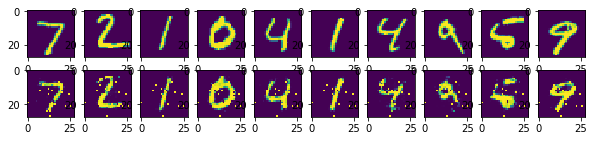

In [8]:
%matplotlib inline
from __future__ import division,print_function,absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#导入数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

#定义学习率
learning_rate=0.01

#中间层神经元个数
n_hidden=256

#输入层神经元个数
n_input=784

#待输入数据
X=tf.placeholder("float",[None,n_input])

#权重
weights={
    'encoder_w':tf.Variable(tf.random_normal([n_input,n_hidden])),
    'decoder_w':tf.Variable(tf.random_normal([n_hidden,n_input])),
}

#定义偏置
biases={
    'encoder_b':tf.Variable(tf.random_normal([n_hidden])),
    'decoder_b':tf.Variable(tf.random_normal([n_input])),
}

#编码过程
def encoder(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_w']),biases['encoder_b']))

#解码过程
def decoder(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_w']),biases['decoder_b']))

#编码开始
encoder_op=encoder(X)

#解码开始
decoder_op=decoder(encoder_op)

#预测值
y_pred=decoder_op

#真实输入值
y_true=X

#代价函数
cost=tf.reduce_mean(tf.pow(y_true-y_pred,2))

#优化过程
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init=tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for epoch  in range(10):#训练十轮
        for i in range(300):#每轮训练300次
            batch_xs,batch_ys=mnist.train.next_batch(256)#每个步骤随机抓取256个批处理数据点
            _,c=sess.run([optimizer,cost],feed_dict={X:batch_xs})#运行
        print("epoch",'%04d'%(epoch+1),"cost","{:.9f}".format(c))
    
    print("结束")
    #评估模型
    encode_decode=sess.run(y_pred,feed_dict={X:mnist.test.images[:10]})
    
    f,a=plt.subplots(2,10,figsize=(10,2))
    
    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(encode_decode[i],(28,28)))
        
    f.show()
    plt.draw()
        
